## Clasificacion con Tensorflow
### Preprocesamiento de los datos

In [3]:
#Librerías
import tensorflow as tf
import numpy as np
import pandas as pd
#Datos
csv_data = np.loadtxt('creditcard.csv',delimiter=',')
#Datos filtrados
filtered_data = csv_data[:,1: -1]
csv_targets = csv_data[:, -1]

## Balanceando el dataset

In [4]:
#Contar cuantos clientes son "1" o deudores
objetivos_uno = int(np.sum(csv_targets))
#Contador de clientes "0" o no deudores
contador_cero_objetivos = 0
#Construyendo un dataset balanceado, tantos 0s como 1s
indices_aremover = []

for i in range(csv_targets.shape[0]):
    if csv_targets[i] == 0:
        contador_cero_objetivos += 1
        if contador_cero_objetivos > objetivos_uno:
            indices_aremover.append(i)
            
new_data_filtrada = np.delete(filtered_data, indices_aremover, axis=0)
targets_new = np.delete(csv_targets, indices_aremover, axis=0)

In [5]:
from sklearn import preprocessing
#Estandarizamos todas las entradas (Nos puede ayudar a mejorar el modelo)
estandarizadas = preprocessing.scale(new_data_filtrada)

In [6]:
#Permutamos nuestras entradas y objetivos
indices_revueltos = np.arange(estandarizadas.shape[0])
np.random.shuffle(indices_revueltos)
#Creamos variables con entradas y objetivos aleatorizados
entradas_revueltas = estandarizadas[indices_revueltos]
objetivos_revueltos = targets_new[indices_revueltos]

### Datso de Entrenamiento, Validación y Prueba

In [7]:
#Extraemos muestras para dividirlas en datos de entrenamiento, validación y prueba
muestras = entradas_revueltas.shape[0]

train_samples = int(0.8 * muestras)

validation_samples = int(0.1 * muestras)

test_samples = muestras - train_samples - validation_samples
#Dataset de entrenamiento
train_inputs = entradas_revueltas[:train_samples]
train_targets = objetivos_revueltos[:train_samples]
#Dataset de validacion
validation_inputs = entradas_revueltas[train_samples:train_samples+validation_samples]
validation_targets = objetivos_revueltos[train_samples:train_samples+validation_samples]
#Dataset de prueba
test_inputs = entradas_revueltas[train_samples+validation_samples:]
test_targets = objetivos_revueltos[train_samples+validation_samples:]

print(np.sum(train_targets), train_samples, np.sum(train_targets) / train_samples)
print(np.sum(validation_targets), validation_samples, np.sum(validation_targets) / validation_samples)
print(np.sum(test_targets), test_samples, np.sum(test_targets) / test_samples)

386.0 787 0.49047013977128334
52.0 98 0.5306122448979592
54.0 99 0.5454545454545454


## Creando la Red Neuronal y entrenando el modelo

In [8]:
input_size = 29 #Según las variables de entrada
output_size = 2 #Según variables de salida
hidden_layer_size = 50
#Creación y entrenamiento del modelo
model = tf.keras.Sequential([tf.keras.layers.Dense(hidden_layer_size, activation='relu'),
                            tf.keras.layers.Dense(hidden_layer_size, activation='relu'),
                            tf.keras.layers.Dense(output_size, activation='softmax')
                            ])
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])
#Mecanismo de parada temprana
parada_temprana = tf.keras.callbacks.EarlyStopping(patience=3)

historia = model.fit(train_inputs,
                     train_targets,
                     epochs=1000,
                     callbacks=[parada_temprana],
                     validation_data=(validation_inputs, validation_targets),
                     verbose=2)

Epoch 1/1000
25/25 - 0s - loss: 0.4969 - accuracy: 0.7802 - val_loss: 0.3570 - val_accuracy: 0.8878
Epoch 2/1000
25/25 - 0s - loss: 0.2868 - accuracy: 0.9047 - val_loss: 0.2599 - val_accuracy: 0.9082
Epoch 3/1000
25/25 - 0s - loss: 0.2182 - accuracy: 0.9238 - val_loss: 0.2031 - val_accuracy: 0.9286
Epoch 4/1000
25/25 - 0s - loss: 0.1799 - accuracy: 0.9403 - val_loss: 0.1798 - val_accuracy: 0.9388
Epoch 5/1000
25/25 - 0s - loss: 0.1521 - accuracy: 0.9479 - val_loss: 0.1606 - val_accuracy: 0.9286
Epoch 6/1000
25/25 - 0s - loss: 0.1353 - accuracy: 0.9543 - val_loss: 0.1461 - val_accuracy: 0.9388
Epoch 7/1000
25/25 - 0s - loss: 0.1240 - accuracy: 0.9555 - val_loss: 0.1340 - val_accuracy: 0.9490
Epoch 8/1000
25/25 - 0s - loss: 0.1153 - accuracy: 0.9606 - val_loss: 0.1276 - val_accuracy: 0.9592
Epoch 9/1000
25/25 - 0s - loss: 0.1067 - accuracy: 0.9682 - val_loss: 0.1293 - val_accuracy: 0.9388
Epoch 10/1000
25/25 - 0s - loss: 0.0997 - accuracy: 0.9670 - val_loss: 0.1193 - val_accuracy: 0.9694

## Observamos el comportamiento del modelo entrenado en un gráfico

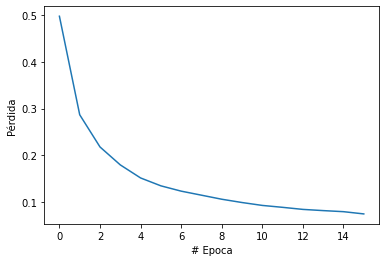

In [9]:
import matplotlib.pyplot as plt
plt.xlabel("# Epoca")
plt.ylabel('Pérdida')
plt.plot(historia.history['loss'])

In [10]:
test_loss, test_accuracy = model.evaluate(test_inputs, test_targets)

4/4 [==============================] - 0s 0s/step - loss: 0.2043 - accuracy: 0.9192


In [11]:
print("Pérdida: {0:.2f} \n Precisión: {1:.2f}%".format(test_loss, test_accuracy*100.))

Pérdida: 0.20 
 Precisión: 91.92%
